<a href="https://colab.research.google.com/github/michel1001/djangoapp/blob/main/GeoLocConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import json
import requests
import shutil # save img locally
import os
import tensorflow as tf
import cv2
import imghdr
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from google.colab import drive
from collections import defaultdict
import random
import heapq
from sklearn.utils import class_weight, compute_class_weight
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 66.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 39.1 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102743 sha256=862d71c4ba51feac54c24834a8a3040abcd69be26044dd69b8038d6fbb055e17
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
getting_images
40000
Min value from every 0 index: -54.851173400878906
Max value from every 0 index: 59.98194885253906
Min value from every 1 index: -170.82867431640625
Max value from every 1 index: 177.95721435546875
-54.851173400878906 -170.82867431640625 59.98194885253906 177.95721435546875


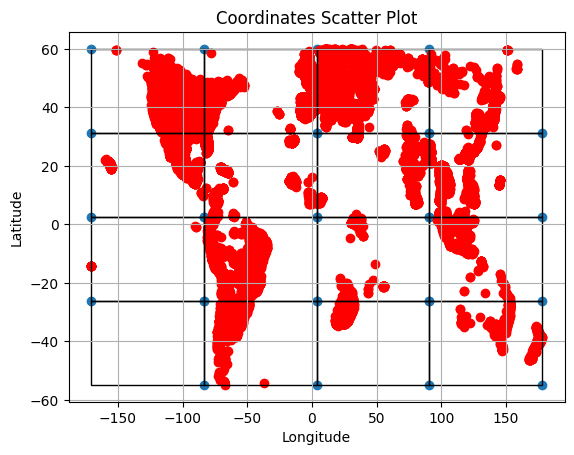

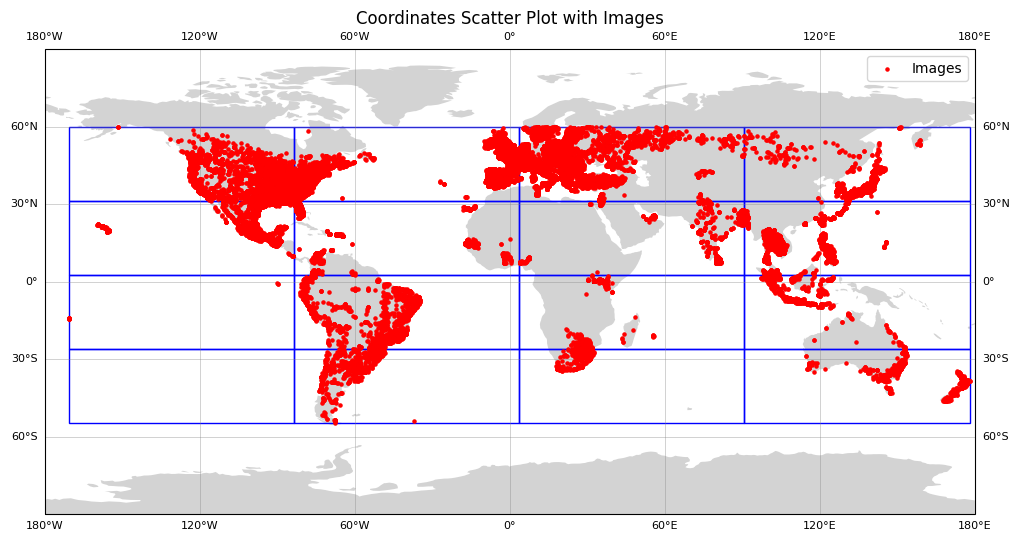

defaultdict(<class 'int'>, {(-26.142892837524414, 3.56427001953125, 2.565387725830078, -83.6322021484375): 1253, (2.565387725830078, 177.95721435546875, 31.27366828918457, 90.7607421875): 3593, (2.565387725830078, 3.56427001953125, 31.27366828918457, -83.6322021484375): 1813, (-54.851173400878906, 90.7607421875, -26.142892837524414, 3.56427001953125): 425, (-26.142892837524414, 177.95721435546875, 2.565387725830078, 90.7607421875): 1649, (2.565387725830078, -83.6322021484375, 31.27366828918457, -170.82867431640625): 3437, (-54.851173400878906, 177.95721435546875, -26.142892837524414, 90.7607421875): 822, (-54.851173400878906, 3.56427001953125, -26.142892837524414, -83.6322021484375): 798, (-26.142892837524414, -83.6322021484375, 2.565387725830078, -170.82867431640625): 12, (-26.142892837524414, 90.7607421875, 2.565387725830078, 3.56427001953125): 509, (2.565387725830078, 90.7607421875, 31.27366828918457, 3.56427001953125): 1308, (31.27366828918457, 177.95721435546875, 59.98194885253906

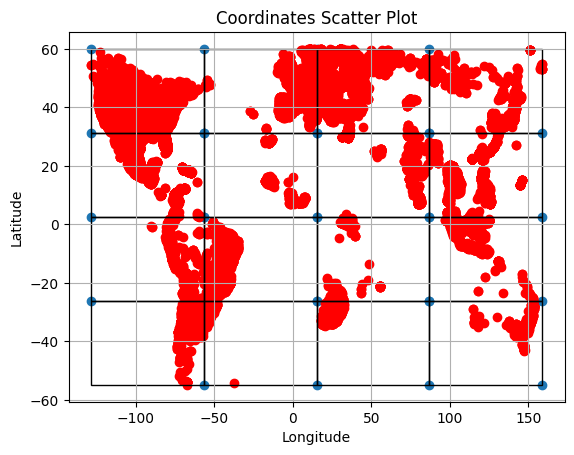

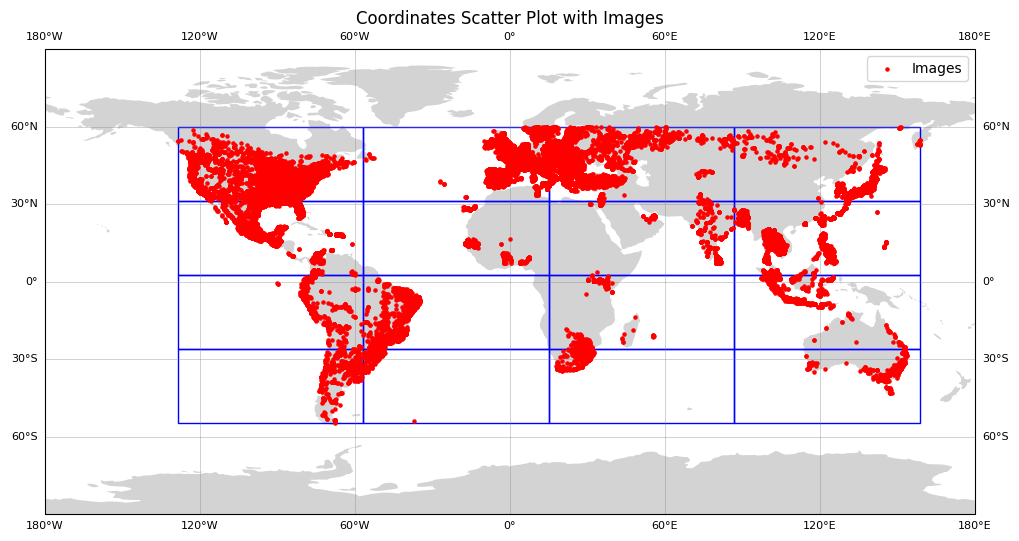

[15, 2, 7, 7, 2, 3, 9, 7, 14, 2, 2, 10, 14, 2, 3, 15, 7, 14, 7, 12, 14, 14, 13, 1, 2, 15, 15, 7, 14, 3, 2, 3, 3, 3, 7, 14, 15, 1, 11, 3, 3, 7, 10, 7, 13, 3, 15, 9, 15, 2, 15, 7, 3, 15, 2, 5, 3, 1, 0, 15, 3, 11, 2, 3, 2, 14, 2, 7, 7, 3, 7, 7, 11, 15, 2, 11, 7, 2, 9, 2, 12, 2, 1, 2, 7, 11, 7, 7, 14, 15, 1, 2, 7, 3, 1, 15, 7, 15, 4, 3, 14, 7, 13, 3, 2, 7, 14, 10, 2, 14, 3, 13, 15, 7, 15, 2, 3, 2, 15, 14, 15, 2, 3, 2, 3, 11, 3, 9, 14, 14, 10, 3, 11, 3, 15, 5, 15, 14, 11, 7, 2, 3, 2, 2, 11, 15, 14, 11, 15, 15, 15, 14, 2, 3, 15, 11, 3, 11, 15, 14, 5, 2, 15, 7, 10, 3, 14, 15, 7, 15, 11, 14, 15, 7, 3, 15, 3, 3, 2, 2, 2, 7, 5, 7, 2, 15, 0, 11, 7, 15, 7, 14, 14, 2, 11, 1, 3, 14, 2, 12, 14, 5, 15, 15, 15, 14, 14, 3, 14, 2, 3, 14, 14, 14, 15, 5, 7, 7, 15, 7, 14, 2, 15, 14, 14, 15, 2, 14, 3, 7, 15, 7, 6, 14, 1, 3, 3, 7, 2, 2, 14, 11, 7, 15, 7, 7, 4, 15, 7, 15, 15, 7, 3, 7, 14, 7, 15, 2, 14, 14, 1, 15, 12, 2, 0, 15, 3, 3, 11, 12, 6, 14, 3, 11, 1, 11, 2, 15, 3, 7, 2, 7, 14, 2, 7, 14, 15, 4, 14, 14, 1

KeyboardInterrupt: ignored

In [38]:
def main():
   drive.mount('/content/drive') #mount drive, where the images lie
   print("getting_images")
   image_dir = get_images(40000) #from different paths get a combined, mixed, randomized variable that contains a large amount of images, doubled images removed
   cordssaver = get_coords(image_dir) #extract coords from every image name and write them in the cordssaver list
   squares_dict, fields = create_squares(cordssaver) #from all coords generate n squares, that are all the same size -> squares_dict; fields =
   show_graphics(squares_dict, cordssaver)
   image_dir = preprocess_dataset(image_dir, squares_dict, cordssaver)

   cordssaver = get_coords(image_dir) #extract coords from every image name and write them in the cordssaver list
   squares_dict, fields = create_squares(cordssaver) #from all coords generate n squares, that are all the same size -> squares_dict; fields =
   show_graphics(squares_dict, cordssaver)

   MyGenerator, label_function = create_data_generator_class(squares_dict, fields)
   batch_size = 32
   my_training_batch_generator = MyGenerator(batch_size=batch_size, img_size=(512, 512, 3), img_path=image_dir, label_function=label_function, fields=fields)
   gpus = tf.config.experimental.list_physical_devices('GPU')
   for gpu in gpus: tf.config.experimental.set_memory_growth(gpu, True)

   model = create_model()
   logdir = 'logs'
   tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)
   opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
   model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
   model.fit(my_training_batch_generator, workers=3, max_queue_size=4, steps_per_epoch = len(image_dir) // batch_size, epochs=12, callbacks=tensorboard_callback, batch_size=batch_size, class_weight=my_training_batch_generator.class_weights)
   testing_and_eval(MyGenerator, model, batch_size, label_function, fields)
if __name__ == "__main__":
    main()

In [5]:
def get_images(amount):
  directories = [
      '/content/drive/My Drive/new/upload_aws_v1',
      '/content/drive/My Drive/new/0-20 (10K)',
      '/content/drive/My Drive/new/20-30 (7K)',
      '/content/drive/My Drive/new/30-35 (11K)',
      '/content/drive/My Drive/new/download_aws',
      '/content/drive/My Drive/new/40-45 (20k)',
      '/content/drive/My Drive/new/45-50 (16k)',
      '/content/drive/My Drive/new/50-60 (20K)',

  ]

  selected_files = []

  for directory in directories:
      files = [
          os.path.join(directory, filename)
          for filename in random.sample(os.listdir(directory), amount//8)
          if os.path.isfile(os.path.join(directory, filename))
      ]
      selected_files.extend(files)

  image_dir = selected_files
  for image in image_dir:
    if image.endswith('(1).jpg'):
      image_dir.remove(image)
      print("removed")
  print(len(image_dir))
  return image_dir

In [6]:
def get_coords(image_dir):
  cordssaver = []
  for image in image_dir:
      start_index = image.index("img_") + len("img_")  # Find the index after "img_"
      end_index = image.index(".jpg")  # Find the index before ".jpg"
      coords_str = image[start_index:end_index]
      coords_lst = coords_str.split(',')
      coords_np = np.array(coords_lst)
      coords = coords_np.astype(np.float64)
      cordssaver.append(coords)
  return cordssaver

In [7]:
def create_squares(cordssaver):
    arr_ndarray = np.array(cordssaver)

    # find the min and max values from every 0 index
    min_0 = np.min(arr_ndarray[:, 0])
    max_0 = np.max(arr_ndarray[:, 0])

    # find the min and max values from every 1 index
    min_1 = np.min(arr_ndarray[:, 1])
    max_1 = np.max(arr_ndarray[:, 1])
    # print the results
    print(f"Min value from every 0 index: {min_0}")
    print(f"Max value from every 0 index: {max_0}")
    print(f"Min value from every 1 index: {min_1}")
    print(f"Max value from every 1 index: {max_1}")

    # Define the bounding box of the area
    west, south, east, north = min_0, min_1, max_0, max_1

    print(west, south, east, north)

    # Define the number of rows and columns in the grid
    rows, cols = 4, 4

    # Calculate the width and height of each field in degrees
    field_width = (east - west) / cols
    field_height = (north - south) / rows

    # Create a grid of points representing the corners of each field
    lon, lat = np.meshgrid(np.linspace(west, east, cols+1), np.linspace(north, south, rows+1))
    points = np.column_stack((lon.flatten(), lat.flatten()))

    # Create a list of field coordinates
    fields = []
    for i in range(rows):
        for j in range(cols):
            # Calculate the indices of the points that form the current field
            p1 = i * (cols+1) + j
            p2 = p1 + 1
            p3 = p2 + cols + 1
            p4 = p3 - 1

            # Calculate the coordinates of the field corners
            west_, south_ = points[p1]
            east_, north_ = points[p3]

            # Append the field coordinates to the list
            fields.append((west_, south_, east_, north_))

    # Print the coordinates of the first field
    squares_dict = {}
    for i in range(len(fields)):
      squares_dict[fields[i]] = i

    return squares_dict, fields


In [8]:
def create_data_generator_class(squares_dict, fields):
    class MyGenerator(tf.keras.utils.Sequence):
        def __init__(self, batch_size, img_size, img_path, label_function, fields, shuffle=True):
            self.shuffle = shuffle
            self.batch_size = batch_size #32
            self.img_size = img_size #(512,512,3)
            self.img_path = img_path #/google drive
            self.label_function = label_function #func, that gets labels from image name
            self.img_list = img_path #liste, mit allen image_namen
            self.n_samples = len(self.img_list) #ca. 10.000
            self.fields = fields
            self.class_weights = self.calculate_class_weights()


        def __len__(self):
            return int(np.ceil(self.n_samples / float(self.batch_size))) #anzahl an batches

        def __getitem__(self, idx):
            batch_x = self.img_list[idx*self.batch_size:(idx+1)*self.batch_size] #nimmt einen Ausschnitt aus der img_liste
            x = np.zeros((self.batch_size, self.img_size[0], self.img_size[1], self.img_size[2]), dtype=np.float32) #creates a np array with zeros in it
            y = np.zeros((self.batch_size, len(self.fields)), dtype=np.int32)
            for i, img_file in enumerate(batch_x):
                img = tf.keras.preprocessing.image.load_img(img_file, target_size=self.img_size, keep_aspect_ratio=True)
                img = tf.keras.preprocessing.image.img_to_array(img)
                img /= 255.0
                x[i] = img
                #print(self.label_function(img_file))
                #print(tf.keras.utils.to_categorical(self.label_function(img_file), num_classes = len(self.fields)))
                y[i] = tf.keras.utils.to_categorical(self.label_function(img_file), num_classes = len(self.fields))
            return x, y

        def calculate_class_weights(self):
            labels = [self.label_function(img_file) for img_file in self.img_list]
            print(labels)
            classes = np.unique(labels)
            class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=labels)
            class_weights_dict = dict(zip(classes, class_weights))
            return class_weights_dict

    def label_function(imagename: str) -> int:
        coords = get_coords_of_image(imagename)
        for i in range(len(fields)): #fields sollte weiter oben definiert sein
          if check_coordinate_in_box(coords[0], coords[1], fields[i]):
            return squares_dict.get(fields[i])

    def get_coords_of_image(image): #filename muss im richtigen Format sein: img_x,y
        start_index = image.index("img_") + len("img_")  # Find the index after "img_"
        end_index = image.index(".jpg")  # Find the index before ".jpg"
        coords_str = image[start_index:end_index]
        coords_lst = coords_str.split(',')
        coords_np = np.array(coords_lst)
        coords = coords_np.astype(np.float64)
        return coords

    def check_coordinate_in_box(lat, lon, box):
        lat1, lon1, lat2, lon2 = box
        if lat1 <= lat <= lat2 and  lon2 <= lon <= lon1:
            return True
        else:
            return False

    return MyGenerator, label_function


In [40]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, kernel_size=3, activation = "relu", padding='same', input_shape = (512, 512, 3)),
        tf.keras.layers.Conv2D(16, kernel_size=3, activation = "relu", padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, kernel_size=3, activation = "relu", padding='same'),
        tf.keras.layers.Conv2D(32, kernel_size=3, activation = "relu", padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, kernel_size=3, activation = "relu", padding='same'),
        tf.keras.layers.Conv2D(64, kernel_size=3, activation = "relu", padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, kernel_size=3, activation = "relu", padding='same'),
        tf.keras.layers.Conv2D(128, kernel_size=3, activation = "relu", padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256, kernel_size=3, activation = "relu", padding='same'),
        tf.keras.layers.Conv2D(256, kernel_size=3, activation = "relu", padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(512, kernel_size=3, activation = "relu", padding='same'),
        tf.keras.layers.Conv2D(512, kernel_size=3, activation = "relu", padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(512, kernel_size=3, activation = "relu", padding='same'),
        tf.keras.layers.Conv2D(512, kernel_size=3, activation = "relu", padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(16, activation="softmax")
    ])
    return model

# Testing and evaluating the Model

---



In [10]:
def testing_and_eval(MyGenerator, model, batch_size, label_function, fields):
    test_images = get_images(1000)
    my_test_batch_generator = MyGenerator(img_path=get_images, img_size=(512, 512, 3), batch_size=batch_size, shuffle=False, label_function=label_function, fields=fields)
    test_loss, test_acc = model.evaluate(my_test_batch_generator)
    print('Test loss:', test_loss)
    print('Test accuracy:', test_acc)

    for i in my_test_batch_generator:
        x, y = i
        yhat = model.predict(x)
        yy = np.argmax(y, axis=1)
        yyhat = np.argmax(yhat, axis=1)
        print(yy, yyhat)
        break

In [53]:
# for i in selected_twenty_thirty_files:
#     start_index = i.index("img_") + len("img_")  # Find the index after "img_"
#     end_index = i.index(".jpg")  # Find the index before ".jpg"
#     coords_str = i[start_index:end_index]
#     coords_lst = coords_str.split(',')
#     x = label_function(i)
#     if not x:
#         selected_twenty_thirty_files.remove(i)
#         print("removed")

In [ ]:


# evaluate the model on the test data




In [ ]:
# for i in my_test_batch_generator:
#   x, y = i
#   yhat = model.predict(x)
#   yy = np.argmax(y, axis=1)
#   yyhat = np.argmax(yhat, axis=1)
#   print(yy, yyhat)



---

# Dataset preprocessing and balancing Functionality

In [36]:
def preprocess_dataset(image_dir, squares_dict, cordssaver):
    for i in range(10):
        image_dir = remove_outliers(image_dir)

    for i in range(20):
        image_dir, removal_list = get_balanced_dataset(image_dir, squares_dict, cordssaver)
        print(len(removal_list))
        for i in removal_list:
            image_dir.remove(i)
    return image_dir

In [29]:
def remove_outliers(image_dir):
    lon = []
    count_dict = {}
    for key in range(0, 201, 10):
            count_dict[key] = 0
            count_dict[-key] = 0

    for image in image_dir:
        if image.endswith("(1).jpg"):
            image_dir.remove(image)
        start_index = image.index("img_") + len("img_")  # Find the index after "img_"
        end_index = image.index(".jpg")  # Find the index before ".jpg"
        coords_str = image[start_index:end_index]
        coords_lst = coords_str.split(',')

        latitude = float(coords_lst[1])

        if latitude<-130 or latitude>160:
            image_dir.remove(image)
        # Determine the corresponding key for the latitude value


        for key in range(0, 201, 10):
            if latitude >= 0:
                if latitude>key:
                    count_dict[key] += 1
            else:
                if latitude<-key:
                    count_dict[-key] += 1
        sorted_dict = dict(sorted(count_dict.items()))


        if float(coords_lst[0])>66:
            lon.append(float(coords_lst[0]))
            image_dir.remove(image)

    return(image_dir)


In [2]:
def check_coords_in_square(coords, square_coords):
    # Extract the individual coordinates of the square
    if square_coords[0] < square_coords[2]:
        x_min, x_max = square_coords[0], square_coords[2]
    else:
        x_min, x_max = square_coords[2], square_coords[0]

    if square_coords[1] < square_coords[3]:
        y_min, y_max = square_coords[1], square_coords[3]
    else:
        y_min, y_max = square_coords[3], square_coords[1]


    # Extract the individual coordinates of the given coords
    x, y = coords
    x = float(x)
    y = float(y)


    # Check if the given coords are within the square
    if x_min <= x <= x_max and y_min <= y <= y_max:
        #print("test")
        return True
    else:
        return False

In [33]:
def get_balanced_dataset(image_dir, squares_dict, cordssaver):
    removal_list = []
    image_counts = get_image_distribution(cordssaver, squares_dict)

    max_square = max(image_counts.values()) #Quadrat mit den Meisten Bilder wird geprintet, Anzahl wird geprintet
    max_values = heapq.nlargest(3, image_counts.values()) #Die 3 höchsten Anzahlen
    third_highest_value = max_values[2] if len(max_values) > 1 else None #Die 3. höchste Anzahl
    min_square = min(image_counts.values()) #Die niedrigste Anzahl
    min_square_coords = next(key for key, value in image_counts.items() if value == min_square) #(22.40586805343628, -8.791648864746094, 24.93093204498291, -84.28532791137695)
    max_square_coords = next(key for key, value in image_counts.items() if value == max_square)
    #print(min_square_coords, min_square, max_square)
    reload = ''



    max_square_lon = min_square_coords[2] #die Nordliche Longitude von dem Quadrat mit den wenigsten Bildern

    if max_square_lon < 0:
        reload = '/content/drive/My Drive/new/upload_aws_v1'
    elif max_square_lon < 20:
        reload = '/content/drive/My Drive/new/0-20 (10K)'
    elif max_square_lon <30:
        reload = '/content/drive/My Drive/new/20-30 (7K)'
    elif max_square_lon <35:
        reload = '/content/drive/My Drive/new/30-35 (11K)'
    elif max_square_lon <40:
        reload = '/content/drive/My Drive/new/download_aws'
    elif max_square_lon <45:
        reload =  '/content/drive/My Drive/new/40-45 (20k)'
    elif max_square_lon <50:
        reload = '/content/drive/My Drive/new/45-50 (16k)'
    else:
        reload =  '/content/drive/My Drive/new/50-60 (20K)'

    #print(reload)
    reload_files = [
          os.path.join(reload, filename)
          for filename in os.listdir(reload)
          if os.path.isfile(os.path.join(reload, filename))
      ]

    for image in reload_files:
        start_index = image.index("img_") + len("img_")  # Find the index after "img_"
        end_index = image.index(".jpg")  # Find the index before ".jpg"
        coords_str = image[start_index:end_index]
        coords_lst = coords_str.split(',')
        if check_coords_in_square(tuple(coords_lst), min_square_coords):
            image_dir.append(image)
        # else:
        #   print(image_counts)
        #   del image_counts[min_square_coords]
        #   break
    image_dir = list(set(image_dir))

    random.shuffle(image_dir)
    for image in image_dir[:max_square-third_highest_value]:
        start_index = image.index("img_") + len("img_")  # Find the index after "img_"
        end_index = image.index(".jpg")  # Find the index before ".jpg"
        coords_str = image[start_index:end_index]
        coords_lst = coords_str.split(',')
        if check_coords_in_square(tuple(coords_lst), max_square_coords):
            stripped_image = image.strip()
            if stripped_image in image_dir:
                removal_list.append(stripped_image)
    print(removal_list)
    return image_dir, removal_list



In [14]:
def get_image_distribution(cordssaver, squares_dict):
  # Create a defaultdict to store the count of images in each square
    image_counts = defaultdict(int)

  # Iterate over the coordinates and count images in each square
    for coordinates in cordssaver:
          for square, square_index in squares_dict.items():
              min_latitude = min(square[1], square[3])
              max_latitude = max(square[1], square[3])
              min_longitude = min(square[0], square[2])
              max_longitude = max(square[0], square[2])


              if (min_latitude <= coordinates[1] <= max_latitude) and (min_longitude <= coordinates[0] <= max_longitude):
                  image_counts[tuple(square)] += 1
                  break
    print(image_counts)
    return image_counts

In [13]:
def show_graphics(squares_dict, cordssaver):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    # Extract coordinates for plotting
    lats = []
    lons = []

    for square_coords in squares_dict.keys():
        lat1, lon1, lat2, lon2 = square_coords
        lats.extend([lat1, lat2])
        lons.extend([lon1, lon2])

    # Extract image coordinates
    image_lats = []  # Latitude coordinates of images
    image_lons = []  # Longitude coordinates of images

    # Assuming you have a list of image coordinates in the format (image_lat, image_lon)
    image_coordinates = [(image_lat, image_lon) for image_lat, image_lon in cordssaver]

    for image_lat, image_lon in image_coordinates:
        image_lats.append(image_lat)
        image_lons.append(image_lon)

    # Plot the coordinates
    fig, ax = plt.subplots()
    ax.scatter(lons, lats)
    ax.scatter(image_lons, image_lats, color='red')  # Add red dots for images
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Coordinates Scatter Plot')
    ax.grid(True)

    # Plot the squares
    for square_coords in squares_dict.keys():
        lat1, lon1, lat2, lon2 = square_coords
        polygon = patches.Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, fill=False)
        ax.add_patch(polygon)

    plt.show()



    import cartopy.crs as ccrs
    from cartopy.io import shapereader
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

    # Create a cartopy map projection
    projection = ccrs.PlateCarree()

    # Create a larger figure with the desired size
    fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': projection})

    # Set the extent to cover the entire world
    ax.set_global()

    # Load the world map shapefile
    shapefile_path = shapereader.natural_earth(resolution='110m', category='physical', name='land')
    ax.add_geometries(shapereader.Reader(shapefile_path).geometries(), projection, facecolor='lightgray', zorder=0)

    # Plot the squares
    for coords, _ in squares_dict.items():
        lat1, lon1, lat2, lon2 = coords
        ax.add_patch(plt.Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, facecolor='none', edgecolor='blue', transform=ccrs.PlateCarree()))

    # Plot the coordinates and images
    ax.scatter([coord[1] for coord in cordssaver], [coord[0] for coord in cordssaver], color='red', label='Images', zorder=3, s=5)

    # Configure gridlines and labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Coordinates Scatter Plot with Images')
    plt.legend()
    plt.show()

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Extract coordinates for plotting
lats = []
lons = []

for square_coords in squares_dict.keys():
    lat1, lon1, lat2, lon2 = square_coords
    lats.extend([lat1, lat2])
    lons.extend([lon1, lon2])

# Extract image coordinates
image_lats = []  # Latitude coordinates of images
image_lons = []  # Longitude coordinates of images

# Assuming you have a list of image coordinates in the format (image_lat, image_lon)
image_coordinates = [(image_lat, image_lon) for image_lat, image_lon in cordssaver]

for image_lat, image_lon in image_coordinates:
    image_lats.append(image_lat)
    image_lons.append(image_lon)

# Plot the coordinates
fig, ax = plt.subplots()
ax.scatter(lons, lats)
ax.scatter(image_lons, image_lats, color='red')  # Add red dots for images
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Coordinates Scatter Plot')
ax.grid(True)

# Plot the squares
for square_coords in squares_dict.keys():
    lat1, lon1, lat2, lon2 = square_coords
    polygon = patches.Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, fill=False)
    ax.add_patch(polygon)

plt.show()



import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Create a cartopy map projection
projection = ccrs.PlateCarree()

# Create a larger figure with the desired size
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': projection})

# Set the extent to cover the entire world
ax.set_global()

# Load the world map shapefile
shapefile_path = shapereader.natural_earth(resolution='110m', category='physical', name='land')
ax.add_geometries(shapereader.Reader(shapefile_path).geometries(), projection, facecolor='lightgray', zorder=0)

# Plot the squares
for coords, _ in squares_dict.items():
    lat1, lon1, lat2, lon2 = coords
    ax.add_patch(plt.Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, facecolor='none', edgecolor='blue', transform=ccrs.PlateCarree()))

# Plot the coordinates and images
ax.scatter([coord[1] for coord in cordssaver], [coord[0] for coord in cordssaver], color='red', label='Images', zorder=3, s=5)

# Configure gridlines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Coordinates Scatter Plot with Images')
plt.legend()
plt.show()

NameError: ignored

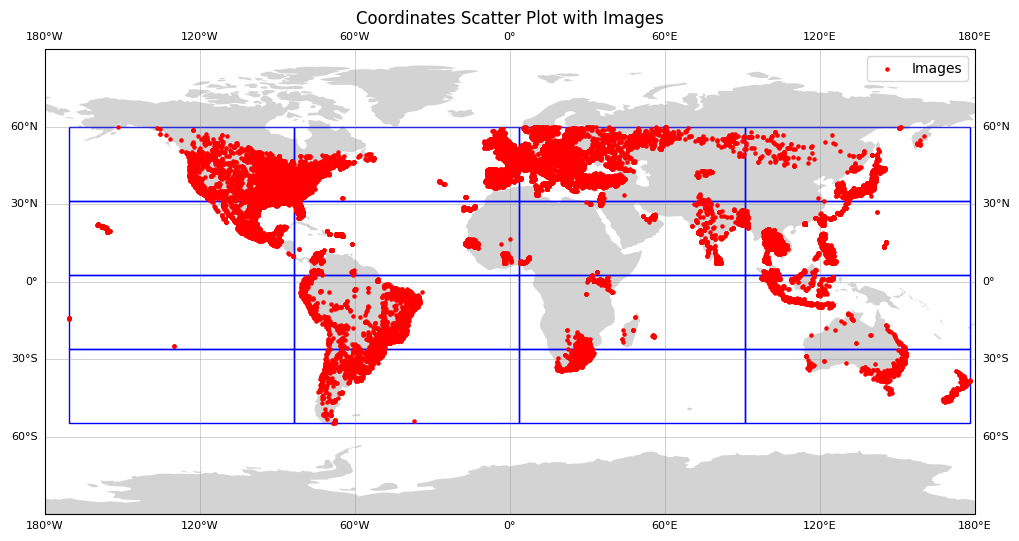

In [34]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Create a cartopy map projection
projection = ccrs.PlateCarree()

# Create a larger figure with the desired size
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': projection})

# Set the extent to cover the entire world
ax.set_global()

# Load the world map shapefile
shapefile_path = shapereader.natural_earth(resolution='110m', category='physical', name='land')
ax.add_geometries(shapereader.Reader(shapefile_path).geometries(), projection, facecolor='lightgray', zorder=0)

# Plot the squares
for coords, _ in squares_dict.items():
    lat1, lon1, lat2, lon2 = coords
    ax.add_patch(plt.Rectangle((lon1, lat1), lon2 - lon1, lat2 - lat1, facecolor='none', edgecolor='blue', transform=ccrs.PlateCarree()))

# Plot the coordinates and images
ax.scatter([coord[1] for coord in cordssaver], [coord[0] for coord in cordssaver], color='red', label='Images', zorder=3, s=5)

# Configure gridlines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Coordinates Scatter Plot with Images')
plt.legend()
plt.show()